# Telecom X - Desafio


# 📌  Extração de dados

In [34]:
import pandas as pd


In [35]:
df = pd.read_json('/content/TelecomX_Data.json')

In [36]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [38]:
df_normalizado = pd.json_normalize(df.to_dict(orient='records'), sep='_')

In [39]:
df_normalizado.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [40]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [41]:
#Checar valores ausentes
df_normalizado.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [42]:
#Checar registros duplicados
df_normalizado.duplicated().sum()

np.int64(0)

In [43]:
#Checar tipo de dados
df_normalizado.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [44]:
import numpy as np

In [45]:
#Converter colunas para float
df_normalizado['account_Charges_Monthly'] = df_normalizado['account_Charges_Monthly'].astype(np.float64)

In [46]:
# Substituir espaços em branco por zero
df_normalizado['account_Charges_Total'] = df_normalizado['account_Charges_Total'].replace(' ', 0)

# Agora converte tudo pra float64
df_normalizado['account_Charges_Total'] = df_normalizado['account_Charges_Total'].astype('float64')

In [47]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [48]:
for col in df_normalizado.select_dtypes('object').columns:
    df_normalizado[col] = (
        df_normalizado[col]
        .astype(str)                   # Garante que são strings
        .str.strip()                   # Remove espaços extras
        .str.lower()                   # Converte para minúsculo
        .str.replace(' ', '_')         # Substitui espaço por underscore
    )

In [49]:
df_normalizado.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one_year,yes,mailed_check,65.6,593.30
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed_check,59.9,542.40
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber_optic,...,no,yes,no,no,no,month-to-month,yes,electronic_check,73.9,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber_optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic_check,98.0,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber_optic,...,no,no,yes,yes,no,month-to-month,yes,mailed_check,83.9,267.40


In [50]:
#Coluna de contas diárias
df_normalizado['contas_diarias'] = (df_normalizado['account_Charges_Monthly'] / 30).round(2)

In [51]:
map_sim_nao = {'sim': 1, 'não': 0, 'yes': 1, 'no': 0}

colunas_binarias = ['customer_Partner', 'customer_Dependents', 'phone_PhoneService',
                    'internet_OnlineSecurity', 'Churn', 'phone_MultipleLines',
                    'internet_DeviceProtection', 'internet_TechSupport',
                    'internet_StreamingTV', 'internet_StreamingMovies', 'account_PaperlessBilling']

for col in colunas_binarias:
    if col in df_normalizado.columns:
        # Substitui 'no_internet_service' por 'no'
        df_normalizado[col] = df_normalizado[col].replace('no_internet_service', 'no')

        # Mapeia 'sim' e 'não' para 1 e 0
        df_normalizado[col] = df_normalizado[col].map(map_sim_nao)

        # Se tiver NaN (valores fora do mapeamento), preenche com 0
        df_normalizado[col] = df_normalizado[col].fillna(0).astype(int)




In [52]:
df_normalizado.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,contas_diarias
0,0002-orfbo,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one_year,1,mailed_check,65.6,593.30,2.19
1,0003-mknfe,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed_check,59.9,542.40,2.00
2,0004-tlhlj,1,male,0,0,0,4,1,0,fiber_optic,...,1,0,0,0,month-to-month,1,electronic_check,73.9,280.85,2.46
3,0011-igkff,1,male,1,1,0,13,1,0,fiber_optic,...,1,0,1,1,month-to-month,1,electronic_check,98.0,1237.85,3.27
4,0013-exchz,1,female,1,1,0,3,1,0,fiber_optic,...,0,1,1,0,month-to-month,1,mailed_check,83.9,267.40,2.80


In [53]:
df_normalizado.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'cancelamento',
    'customer_gender': 'genero_cliente',
    'customer_SeniorCitizen': 'cliente_idoso',
    'customer_Partner': 'possui_companheiro',
    'customer_Dependents': 'possui_dependentes',
    'customer_tenure': 'tempo_como_cliente',
    'phone_PhoneService': 'servico_telefonico',
    'phone_MultipleLines': 'multiplas_linhas',
    'internet_InternetService': 'tipo_servico_internet',
    'internet_OnlineSecurity': 'seguranca_online',
    'internet_OnlineBackup': 'backup_online',
    'internet_DeviceProtection': 'protecao_dispositivo',
    'internet_TechSupport': 'suporte_tecnico',
    'internet_StreamingTV': 'streaming_tv',
    'internet_StreamingMovies': 'streaming_filmes',
    'account_Contract': 'tipo_contrato',
    'account_PaperlessBilling': 'fatura_eletronica',
    'account_PaymentMethod': 'metodo_pagamento',
    'account_Charges_Monthly': 'cobranca_mensal',
    'account_Charges_Total': 'cobranca_total',
    'contas_diarias': 'contas_diarias'
}, inplace=True)

print(df_normalizado.columns)



Index(['id_cliente', 'cancelamento', 'genero_cliente', 'cliente_idoso',
       'possui_companheiro', 'possui_dependentes', 'tempo_como_cliente',
       'servico_telefonico', 'multiplas_linhas', 'tipo_servico_internet',
       'seguranca_online', 'backup_online', 'protecao_dispositivo',
       'suporte_tecnico', 'streaming_tv', 'streaming_filmes', 'tipo_contrato',
       'fatura_eletronica', 'metodo_pagamento', 'cobranca_mensal',
       'cobranca_total', 'contas_diarias'],
      dtype='object')


In [54]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_cliente             7267 non-null   object 
 1   cancelamento           7267 non-null   int64  
 2   genero_cliente         7267 non-null   object 
 3   cliente_idoso          7267 non-null   int64  
 4   possui_companheiro     7267 non-null   int64  
 5   possui_dependentes     7267 non-null   int64  
 6   tempo_como_cliente     7267 non-null   int64  
 7   servico_telefonico     7267 non-null   int64  
 8   multiplas_linhas       7267 non-null   int64  
 9   tipo_servico_internet  7267 non-null   object 
 10  seguranca_online       7267 non-null   int64  
 11  backup_online          7267 non-null   object 
 12  protecao_dispositivo   7267 non-null   int64  
 13  suporte_tecnico        7267 non-null   int64  
 14  streaming_tv           7267 non-null   int64  
 15  stre

# 🔧 Transformação

# 📊 Carga e análise

In [55]:
# Gerar estatísticas descritivas para colunas numéricas
descricao_numerica = df_normalizado.describe()
print(df_normalizado.describe().round(2))

       cancelamento  cliente_idoso  possui_companheiro  possui_dependentes  \
count       7267.00        7267.00             7267.00             7267.00   
mean           0.26           0.16                0.48                0.30   
std            0.44           0.37                0.50                0.46   
min            0.00           0.00                0.00                0.00   
25%            0.00           0.00                0.00                0.00   
50%            0.00           0.00                0.00                0.00   
75%            1.00           0.00                1.00                1.00   
max            1.00           1.00                1.00                1.00   

       tempo_como_cliente  servico_telefonico  multiplas_linhas  \
count             7267.00              7267.0           7267.00   
mean                32.35                 0.9              0.42   
std                 24.57                 0.3              0.49   
min                  0.00    

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

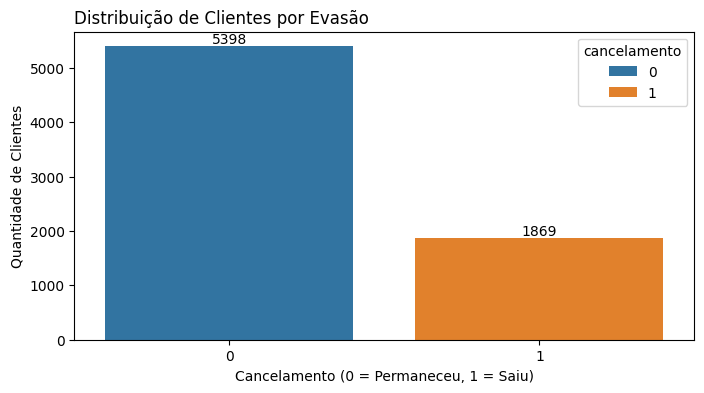

In [57]:
# Gráfico de contagem da coluna 'Churn' (supondo que 1 = saiu, 0 = ficou)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(data=df_normalizado, x="cancelamento", hue='cancelamento', palette='tab10', dodge=False)

# Adiciona rótulos
ax.set_title("Distribuição de Clientes por Evasão", fontsize=12, loc='left')
ax.set_xlabel("Cancelamento (0 = Permaneceu, 1 = Saiu)", fontsize=10)
ax.set_ylabel("Quantidade de Clientes", fontsize=10)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

In [58]:
#Calcular a taxa de cancelamento por gênero:
df_normalizado.groupby('genero_cliente')['cancelamento'].mean().round(2)

,cancelamento
genero_cliente,
female,0.26
male,0.25


In [59]:
#Calcular evasão por tipo de contrato:
df_normalizado.groupby('tipo_contrato')['cancelamento'].mean().sort_values(ascending=False)

,cancelamento
tipo_contrato,
month-to-month,0.413233
one_year,0.109282
two_year,0.027539


In [60]:
#Calcular evasão por tipo de contrato
df_normalizado.groupby('metodo_pagamento')['cancelamento'].mean().sort_values(ascending=False)

,cancelamento
metodo_pagamento,
electronic_check,0.438037
mailed_check,0.184985
bank_transfer_(automatic),0.162366
credit_card_(automatic),0.147959


In [61]:
#Calcular a evasão por serviços adicionais:
df_normalizado.groupby('backup_online')['cancelamento'].mean()



,cancelamento
backup_online,
no,0.387492
no_internet_service,0.071474
yes,0.208866


In [62]:
df_normalizado.groupby('suporte_tecnico')['cancelamento'].mean()


,cancelamento
suporte_tecnico,
0,0.301956
1,0.147338


In [63]:
df_normalizado.groupby('streaming_tv')['cancelamento'].mean()

,cancelamento
streaming_tv,
0,0.235649
1,0.291756


In [64]:
#Calcular evasão de acordo com responsabilidades familiares:
df_normalizado.groupby('possui_companheiro')['cancelamento'].mean()



,cancelamento
possui_companheiro,
0,0.320085
1,0.190165


In [65]:
df_normalizado.groupby('possui_dependentes')['cancelamento'].mean()

,cancelamento
possui_dependentes,
0,0.303382
1,0.149473


In [66]:
#Calcular evasão por tipo de serviço:
df_normalizado.groupby('tipo_servico_internet')['cancelamento'].mean()

,cancelamento
tipo_servico_internet,
dsl,0.184486
fiber_optic,0.405566
no,0.071474


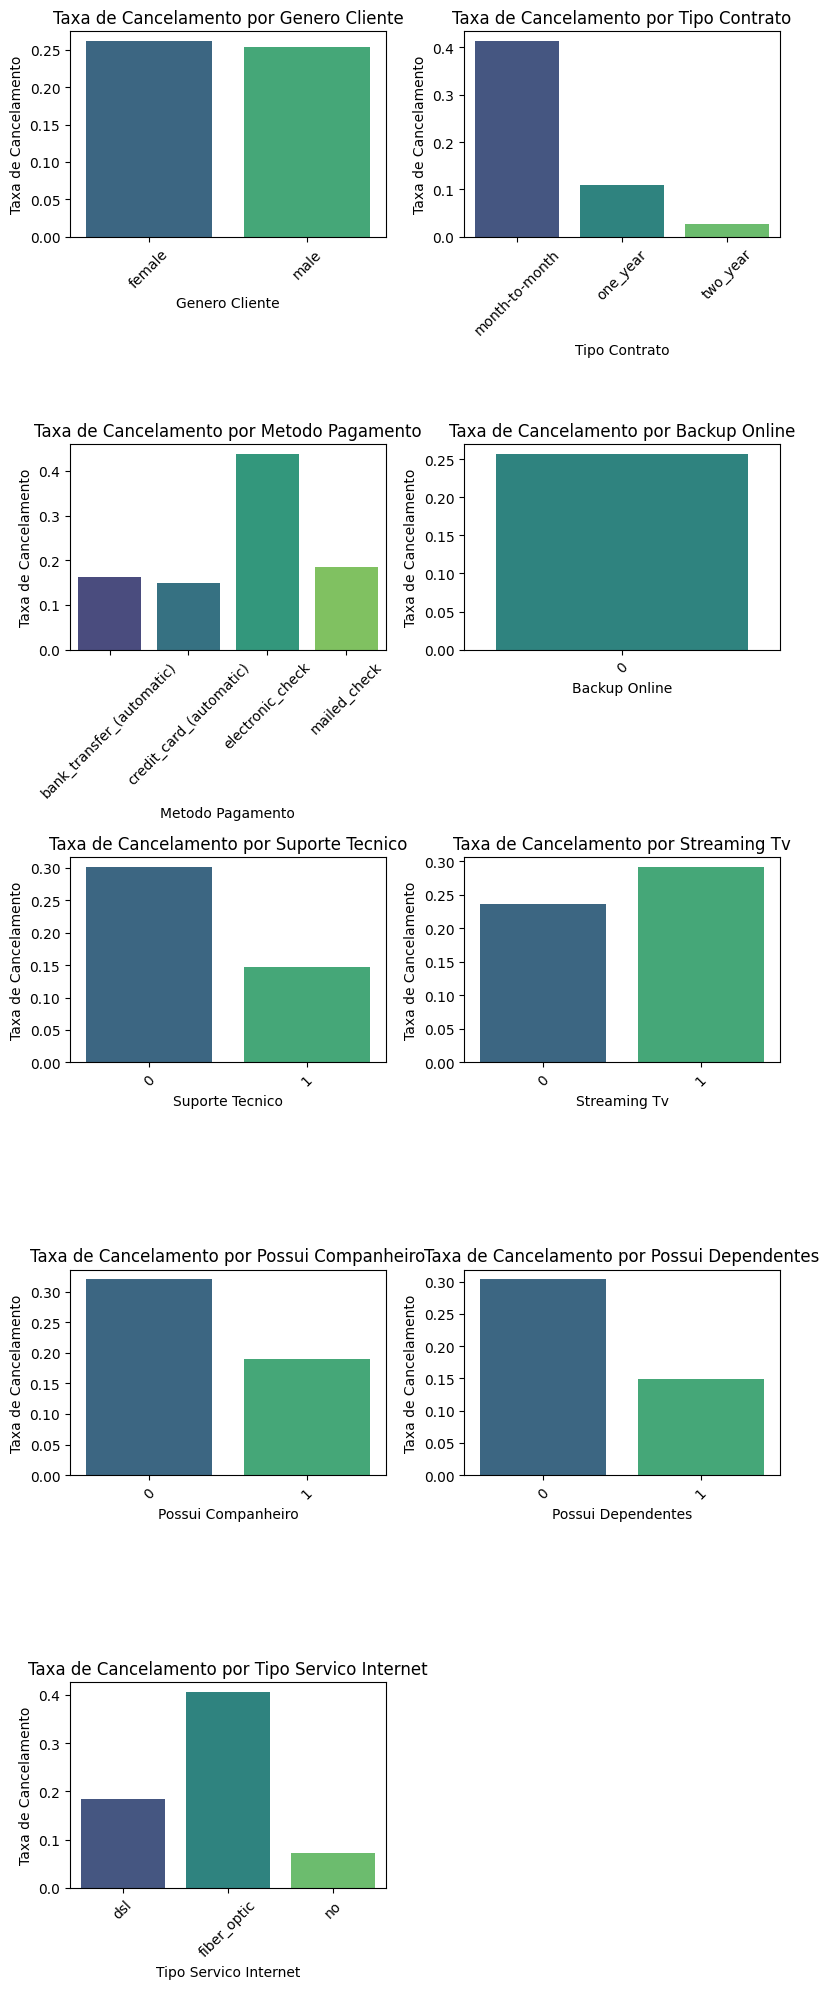

In [84]:
# Lista das colunas categóricas para análise
variaveis_categoricas = [
    'genero_cliente',
    'tipo_contrato',
    'metodo_pagamento',
    'backup_online',
    'suporte_tecnico',
    'streaming_tv',
    'possui_companheiro',
    'possui_dependentes',
    'tipo_servico_internet'
]

# Tamanho do grid de plots
n_linhas = (len(variaveis_categoricas) + 1) // 2

# Define tamanho da figura
plt.figure(figsize=(8, 4 * n_linhas))

# Loop para criar os gráficos
for i, col in enumerate(variaveis_categoricas, 1):
    plt.subplot(n_linhas, 2, i)
    taxa_cancelamento = df_normalizado.groupby(col)['cancelamento'].mean().reset_index()
    sns.barplot(data=taxa_cancelamento, x=col, y='cancelamento', hue=col, palette='viridis', legend=False)
    plt.title(f'Taxa de Cancelamento por {col.replace("_", " ").title()}', fontsize=12)
    plt.ylabel('Taxa de Cancelamento')
    plt.xlabel(col.replace("_", " ").title())
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


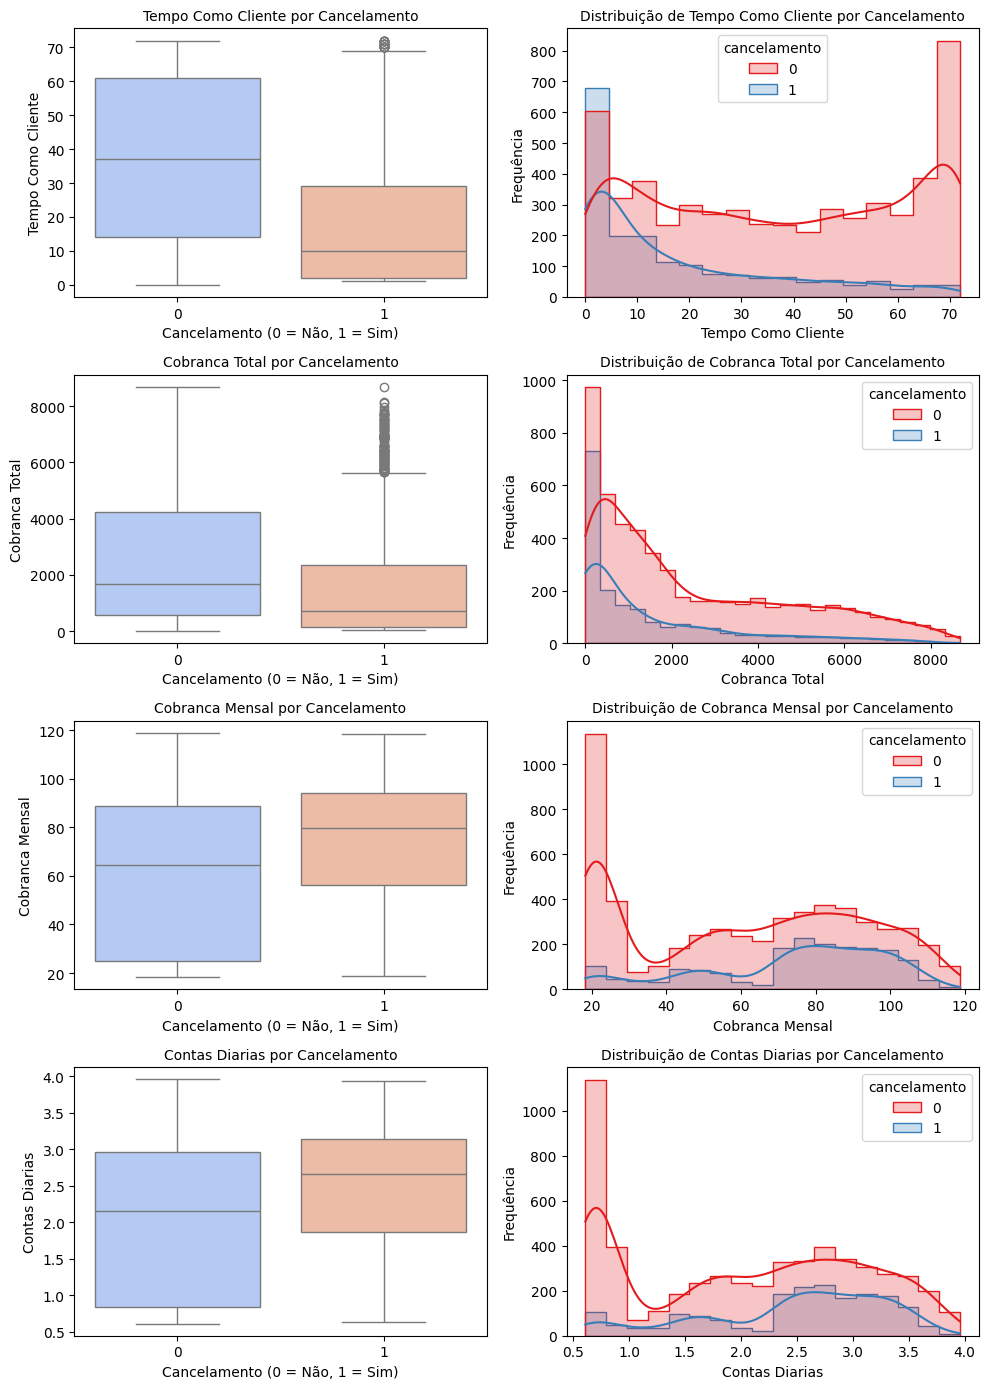

In [87]:
variaveis_numericas = ['tempo_como_cliente', 'cobranca_total', 'cobranca_mensal', 'contas_diarias']

plt.figure(figsize=(10, 14))

for i, col in enumerate(variaveis_numericas, 1):
    # Boxplot
    plt.subplot(len(variaveis_numericas), 2, 2*i-1)
    sns.boxplot(data=df_normalizado, x='cancelamento', y=col, hue='cancelamento', palette='coolwarm', legend=False)
    plt.title(f'{col.replace("_", " ").title()} por Cancelamento', fontsize=10)
    plt.xlabel("Cancelamento (0 = Não, 1 = Sim)")
    plt.ylabel(col.replace("_", " ").title())

    # Histograma com KDE
    plt.subplot(len(variaveis_numericas), 2, 2*i)
    sns.histplot(data=df_normalizado, x=col, hue='cancelamento', kde=True, palette='Set1', element='step')
    plt.title(f'Distribuição de {col.replace("_", " ").title()} por Cancelamento', fontsize=10)
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequência')

plt.tight_layout()
plt.savefig('analise_variaveis_numericas.png', dpi=300, bbox_inches='tight')
plt.show()

# 📄 Relatório Final — Análise de Evasão de Clientes (Churn) - Telecom X

## 🧠 Introdução

Este projeto teve como objetivo analisar os dados da empresa **Telecom X** para entender os principais fatores que influenciam a **evasão de clientes (Churn)**. Através de uma abordagem estruturada com **limpeza de dados, análise exploratória e visualizações**, buscamos responder à pergunta:  
**"O que faz um cliente cancelar seu contrato?"**

---

## 🧼 Limpeza e Tratamento de Dados

As principais etapas realizadas foram:

- **Importação e normalização** dos dados no formato `.json`.
- **Conversão de colunas numéricas** com tipos inconsistentes (`object` → `float`).
- **Padronização de valores categóricos**: lowercase, underscores e substituição de espaços.
- **Transformação de variáveis binárias** (‘sim’/‘não’, ‘yes’/‘no’) para valores numéricos (1 e 0).
- Criação da feature `contas_diarias` para representar a cobrança diária média do cliente.

---

## 📊 Análise Exploratória de Dados (EDA)

Diversas visualizações e agrupamentos foram usados para encontrar padrões entre os clientes que **cancelaram** e os que **permaneceram**.

---

### 🔍 1. Tempo Como Cliente vs Cancelamento

#### 📦 Boxplot
- **Grupo 0 (não cancelou)**:
  - Mediana: ~40 meses
  - Distribuição ampla (até 72 meses)
- **Grupo 1 (cancelou)**:
  - Mediana: ~10 meses
  - Maioria cancelou com menos de 15 meses

✅ **Interpretação**:  
Clientes que cancelam geralmente são novos. A evasão precoce é um padrão forte aqui.

#### 📈 Histograma
- **Curva vermelha (cancelou)**: concentrada nos 0–10 meses
- **Curva azul (ficou)**: cresce com o tempo

✅ **Refinamento**:  
A chance de churn diminui drasticamente após 20 meses.

📌 **Insight estratégico**:  
**Os primeiros 3 a 6 meses são críticos**. Investir forte em retenção nesse período.

---

### 🔍 2. Cobrança Total vs Cancelamento

#### 📦 Boxplot
- Clientes que não cancelaram têm **cobrança total maior e mais distribuída**.
- Clientes que cancelaram gastaram **muito pouco antes de sair**.

✅ **Interpretação**:  
Churn está relacionado ao **baixo investimento acumulado** — ou seja, saem rápido e cedo.

#### 📈 Histograma
- **Curva vermelha** (cancelou): alta para valores baixos de cobrança (~0–1000).
- **Curva azul** (ficou): aparece mais nos valores altos (>3000).

📌 **Insight estratégico**:  
Clientes que permanecem têm **lifetime value** maior. Precisa **aumentar o valor percebido logo no início**.

---

### 💰 3. Custo Mensal (cobranca_mensal) vs Cancelamento

#### 📦 Boxplot
- Clientes que cancelaram pagam **mais por mês** do que os que ficaram.
- Mediana dos cancelados: **> 75**
- Mediana dos que ficaram: **< 75**

#### 📈 Histograma
- **Curva vermelha (cancelou)**: concentrada entre R$60 e R$100
- **Curva azul (ficou)**: mais distribuída e com picos nos valores mais baixos

✅ **Interpretação**:  
**Clientes com mensalidade alta têm maior risco de churn**, especialmente se não percebem valor agregado.

📌 **Insight**:  
**Sensibilidade a preço é real.** Se o serviço não justificar o custo, o cancelamento vem.

---

### 📌 Contrato

| Tipo de Contrato | Taxa de Cancelamento |
|------------------|-----------------------|
| Month-to-month   | **41,3%**             |
| One year         | 10,9%                 |
| Two year         | 2,8%                  |

➡️ **Clientes com contrato mensal são os mais propensos a cancelar.**

---

### 💳 Método de Pagamento

| Método de Pagamento           | Churn (%) |
|-------------------------------|-----------|
| Electronic Check              | **43,8%** |
| Mailed Check                  | 18,5%     |
| Bank Transfer (Automatic)     | 16,2%     |
| Credit Card (Automatic)       | 14,8%     |

➡️ **Pagamentos manuais estão ligados à maior evasão.**

---

### 🎁 Serviços Adicionais

| Serviço              | Cancelamento (%) |
|----------------------|------------------|
| Sem Backup Online    | 38,7%            |
| Com Backup Online    | 20,9%            |
| Sem Suporte Técnico  | 30,2%            |
| Com Suporte Técnico  | 14,7%            |
| Sem Streaming TV     | 23,6%            |
| Com Streaming TV     | 29,2%            |

➡️ Clientes **sem serviços extras** tendem a sair mais.

---

### 👨‍👩‍👧 Perfil Familiar

| Situação              | Churn (%) |
|-----------------------|-----------|
| Sem Companheiro(a)    | 32,0%     |
| Com Companheiro(a)    | 19,0%     |
| Sem Dependentes       | 30,3%     |
| Com Dependentes       | 14,9%     |

➡️ Ter família parece ser um fator de retenção.

---

### 🌐 Tipo de Internet

| Tipo de Internet | Churn (%) |
|------------------|-----------|
| Fiber Optic      | **40,6%** |
| DSL              | 18,4%     |
| Sem Internet     | 7,1%      |

➡️ Aparentemente, **clientes de fibra óptica estão mais insatisfeitos**, mesmo com melhor tecnologia.

---

### 👥 Gênero

| Gênero   | Cancelamento (%) |
|----------|------------------|
| Feminino | 26,0%            |
| Masculino| 25,0%            |

➡️ **Gênero não influencia significativamente o churn.**

---

## ✅ Resumo das Interpretações

| Variável           | Cancelamento | Padrão Identificado                        | Ação Sugerida                                              |
|--------------------|--------------|--------------------------------------------|-------------------------------------------------------------|
| Tempo como Cliente | 1 (Sim)      | Sai cedo, geralmente < 15 meses            | Estratégias de onboarding e fidelização nos primeiros meses |
| Cobrança Total     | 1 (Sim)      | Gastaram pouco → saíram cedo               | Aumentar valor percebido rapidamente                        |
| Custo Mensal       | 1 (Sim)      | Pagam mais por mês                         | Oferecer mais valor ou plano mais acessível                |

---

## ✅ Recomendações

1. **Incentivar migração para contratos de 1 ou 2 anos** com benefícios (ex: desconto no primeiro mês).
2. **Oferecer bônus ou descontos para quem adotar pagamento automático**.
3. Criar **campanhas de retenção** focadas em clientes com **cobrança mensal alta**.
4. Promover **serviços extras gratuitos por tempo limitado** (ex: backup ou suporte técnico) como estratégia de fidelização.
5. **Investigar insatisfação de clientes com fibra óptica**, já que esse grupo apresenta churn elevado.
6. **Foco total nos primeiros 3 a 6 meses** do cliente com onboarding, atendimento personalizado e percepção de valor.

---

